# A demonstration of the Adam optimizer

Done by:

- 23B1277 - Yaswanth Ram Kumar B
- 23B1260 - Prathmesh Baral
- 23B1311 - Manidheep Reddy
- 23B2155 - Abhinav Reddy B

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Defining the bowl-shaped function z = x^2 + y^2 + 10
def bowl_function(x, y):
    return x**2 + y**2 + 10
"""
def cross_entropy_loss(p, y):
    p = np.clip(p, 1e-8, 1 - 1e-8)
    return - (y * np.log(p) + (1 - y) * np.log(1 - p))
"""
#Computing gradients for the function
def compute_gradients(x, y):
    dz_dx = 2 * x
    dz_dy = 2 * y
    return dz_dx, dz_dy

Adam optimizer implementation

In [ ]:
def adam_optimizer(lr, beta1, beta2, epsilon, steps, init_x, init_y):
    x, y = init_x, init_y
    m_x, m_y = 0, 0
    v_x, v_y = 0, 0

    positions = [(x, y)]  #Tracking positions for plotting

    for t in range(1, steps + 1):
        #Computing gradients
        grad_x, grad_y = compute_gradients(x, y)

        #Updating biased first moment estimates
        m_x = beta1 * m_x + (1 - beta1) * grad_x
        m_y = beta1 * m_y + (1 - beta1) * grad_y

        #Updating biased second moment estimates
        v_x = beta2 * v_x + (1 - beta2) * (grad_x ** 2)
        v_y = beta2 * v_y + (1 - beta2) * (grad_y ** 2)

        #Bias correction
        m_x_hat = m_x / (1 - beta1 ** t)
        m_y_hat = m_y / (1 - beta1 ** t)
        v_x_hat = v_x / (1 - beta2 ** t)
        v_y_hat = v_y / (1 - beta2 ** t)

        #Updating parameters
        x -= lr * m_x_hat / (np.sqrt(v_x_hat) + epsilon)
        y -= lr * m_y_hat / (np.sqrt(v_y_hat) + epsilon)

        #Tracking position
        positions.append((x, y))

    return positions

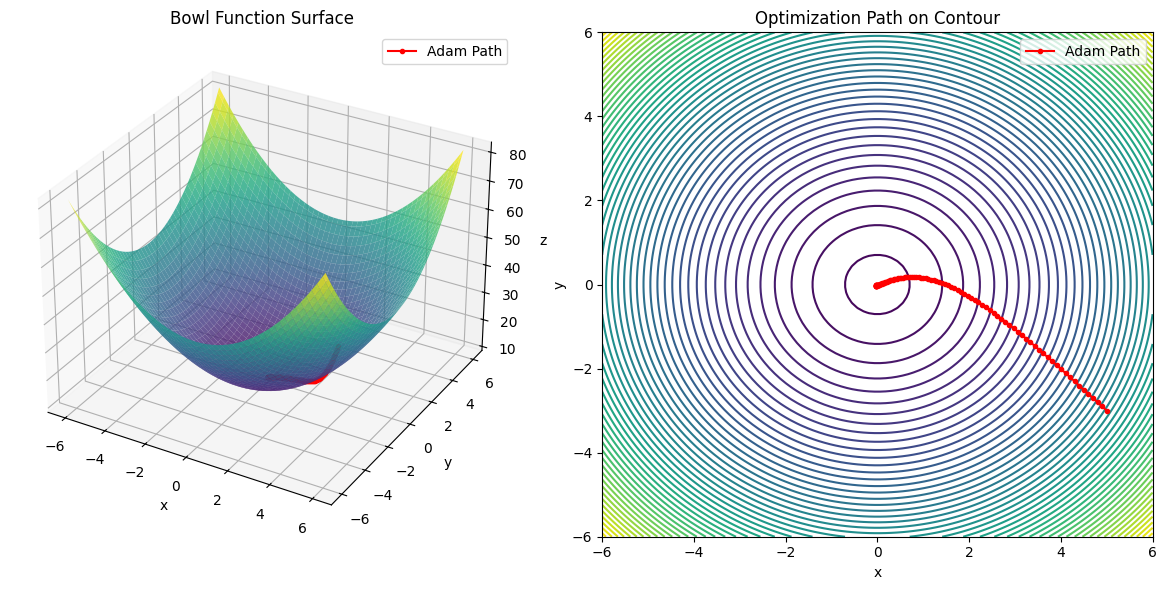

In [ ]:
learning_rate = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
steps = 100
initial_x, initial_y = 5, -3  # Initial position

#Applying Adam optimizer
positions = adam_optimizer(learning_rate, beta1, beta2, epsilon, steps, initial_x, initial_y)

#Plotting the 3D bowl-shaped function
fig = plt.figure(figsize=(12, 6))

#Left: 3D function surface
ax1 = fig.add_subplot(121, projection='3d')
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = bowl_function(X, Y)
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title('Bowl Function Surface')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

#Plotting optimization path on the 3D surface
positions_np = np.array(positions)
z_positions = bowl_function(positions_np[:, 0], positions_np[:, 1])
ax1.plot(positions_np[:, 0], positions_np[:, 1], z_positions, color='red', marker='o', markersize=3, label='Adam Path')
ax1.legend()

#Right: 2D contour plot of the optimization path
ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, levels=50, cmap='viridis')
ax2.plot(positions_np[:, 0], positions_np[:, 1], color='red', marker='o', markersize=3, label='Adam Path')
ax2.set_title('Optimization Path on Contour')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.tight_layout()
plt.show()


lr = 0.1, steps = 40

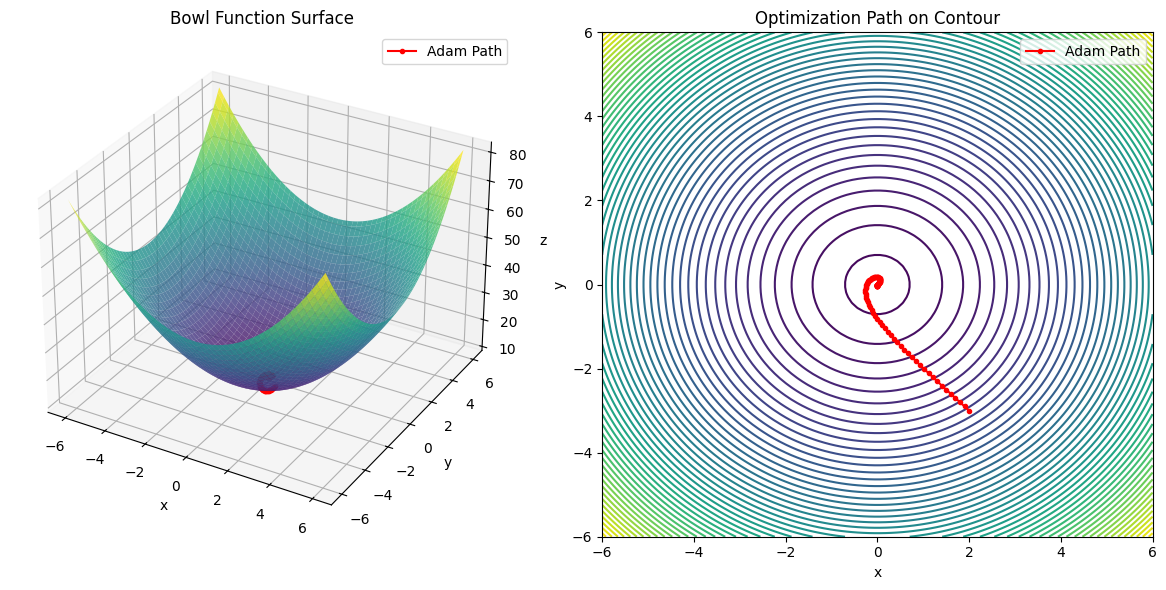

In [ ]:
learning_rate = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
steps = 100
initial_x, initial_y = 2, -3  # Initial position

#Applying Adam optimizer
positions = adam_optimizer(learning_rate, beta1, beta2, epsilon, steps, initial_x, initial_y)

#Plotting the 3D bowl-shaped function
fig = plt.figure(figsize=(12, 6))

#Left: 3D function surface
ax1 = fig.add_subplot(121, projection='3d')
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = bowl_function(X, Y)
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title('Bowl Function Surface')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

#Plotting optimization path on the 3D surface
positions_np = np.array(positions)
z_positions = bowl_function(positions_np[:, 0], positions_np[:, 1])
ax1.plot(positions_np[:, 0], positions_np[:, 1], z_positions, color='red', marker='o', markersize=3, label='Adam Path')
ax1.legend()

#Right: 2D contour plot of the optimization path
ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, levels=50, cmap='viridis')
ax2.plot(positions_np[:, 0], positions_np[:, 1], color='red', marker='o', markersize=3, label='Adam Path')
ax2.set_title('Optimization Path on Contour')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.tight_layout()
plt.show()


Thank You